In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from termcolor import colored
from termcolor import cprint
from datetime import date
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler


# ml algorithm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import ElasticNet
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.width", 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [130]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [131]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,2.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,3.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [132]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], dtype='object')

In [133]:
df.shape

(34857, 21)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [135]:
def check_df(dataframe, head=5):
    print("###################### Shape ######################")
    print(dataframe.shape)
    print("###################### İnfo ######################")
    print(dataframe.info())
    print("###################### Types ######################")
    print(dataframe.dtypes)
    print("###################### Head ######################")
    print(dataframe.head(head))
    print("###################### Tail ######################")
    print(dataframe.tail(head))
    print("###################### All Columns ######################")
    print(dataframe.columns)
    print("###################### Number of Uniques ######################")
    print(dataframe.nunique())
    print("###################### Quantiles ######################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("###################### Descriptive Statistics ######################")
    print(dataframe.describe().T.round(2))

check_df(df)

###################### Shape ######################
(34857, 21)
###################### İnfo ######################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 no

In [136]:
def first_look(df, col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))
    print("#####################################")

first_look(df, "Price")


column name    :  Price
--------------------------------
per_of_nulls   :  % 21.83
num_of_nulls   :  7610
num_of_uniques :  2872
shape_of_df    :  (34857, 21)
--------------------------------
Price
NaN             7610
600000.000       235
1100000.000      235
650000.000       219
800000.000       217
1300000.000      210
1000000.000      205
1200000.000      204
700000.000       197
750000.000       194
900000.000       191
850000.000       176
950000.000       172
1250000.000      158
1500000.000      153
500000.000       153
1400000.000      150
1150000.000      149
550000.000       141
1050000.000      139
780000.000       136
770000.000       131
720000.000       128
1350000.000      125
630000.000       124
730000.000       124
620000.000       123
580000.000       123
680000.000       122
820000.000       120
640000.000       120
660000.000       119
670000.000       118
760000.000       118
880000.000       115
810000.000       114
860000.000       112
920000.000       111
5200

In [137]:
def remove_duplicates(df):
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)

df.duplicated().sum()


1

In [138]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [139]:
def grab_col_names(dataframe, cat_th=250, car_th=500):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 250 and df[col].dtype in ["int64", "float64"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > 500 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#####################################")

cat_summary(df, "Car")

for col in cat_cols:
    cat_summary(df, col)

Observations: 34856
Variables: 21
cat_cols: 14
num_cols: 6
cat_but_car: 1
num_but_cat: 7
          Car  Ratio
Car                 
2.000   12213 35.038
1.000    9164 26.291
0.000    1631  4.679
3.000    1606  4.608
4.000    1161  3.331
5.000     151  0.433
6.000     140  0.402
7.000      25  0.072
8.000      23  0.066
10.000      6  0.017
9.000       3  0.009
11.000      2  0.006
26.000      1  0.003
18.000      1  0.003
12.000      1  0.003
#####################################
                    Suburb  Ratio
Suburb                           
Reservoir              844  2.421
Bentleigh East         583  1.673
Richmond               552  1.584
Glen Iris              491  1.409
Preston                485  1.391
Kew                    467  1.340
Brighton               456  1.308
Brunswick              444  1.274
South Yarra            435  1.248
Hawthorn               428  1.228
Northcote              424  1.216
Camberwell             423  1.214
Balwyn North           420  1.205
Essend

In [140]:
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#####################################")

cat_summary(df, "Car")

for col in cat_cols:
    cat_summary(df, col)

          Car  Ratio
Car                 
2.000   12213 35.038
1.000    9164 26.291
0.000    1631  4.679
3.000    1606  4.608
4.000    1161  3.331
5.000     151  0.433
6.000     140  0.402
7.000      25  0.072
8.000      23  0.066
10.000      6  0.017
9.000       3  0.009
11.000      2  0.006
26.000      1  0.003
18.000      1  0.003
12.000      1  0.003
#####################################
                    Suburb  Ratio
Suburb                           
Reservoir              844  2.421
Bentleigh East         583  1.673
Richmond               552  1.584
Glen Iris              491  1.409
Preston                485  1.391
Kew                    467  1.340
Brighton               456  1.308
Brunswick              444  1.274
South Yarra            435  1.248
Hawthorn               428  1.228
Northcote              424  1.216
Camberwell             423  1.214
Balwyn North           420  1.205
Essendon               409  1.173
Coburg                 405  1.162
Glenroy                400 

count      27247.000
mean     1050173.345
std       641467.130
min        85000.000
5%        415000.000
10%       485300.000
20%       594600.000
30%       678000.000
40%       770000.000
50%       870000.000
60%      1000000.000
70%      1200000.000
80%      1400000.000
90%      1800000.000
95%      2250000.000
99%      3400540.000
max     11200000.000
Name: Price, dtype: float64


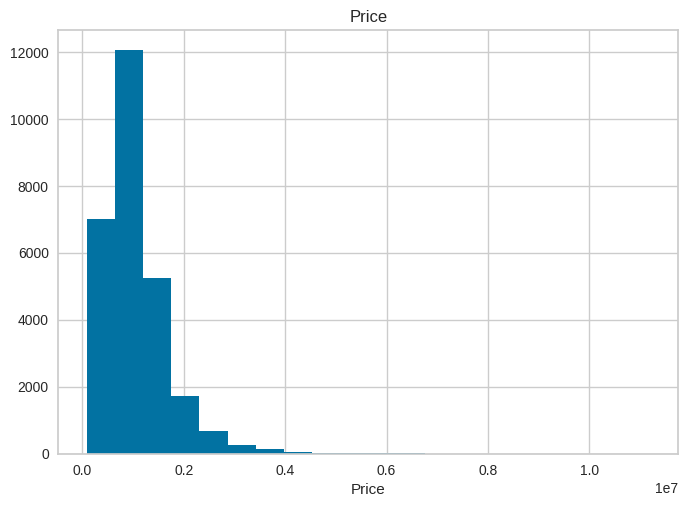

count    23046.000
mean       593.607
std       3398.915
min          0.000
5%           0.000
10%          0.000
20%        179.000
30%        276.000
40%        385.000
50%        521.000
60%        587.000
70%        648.000
80%        702.000
90%        824.000
95%       1001.000
99%       2942.400
max     433014.000
Name: Landsize, dtype: float64


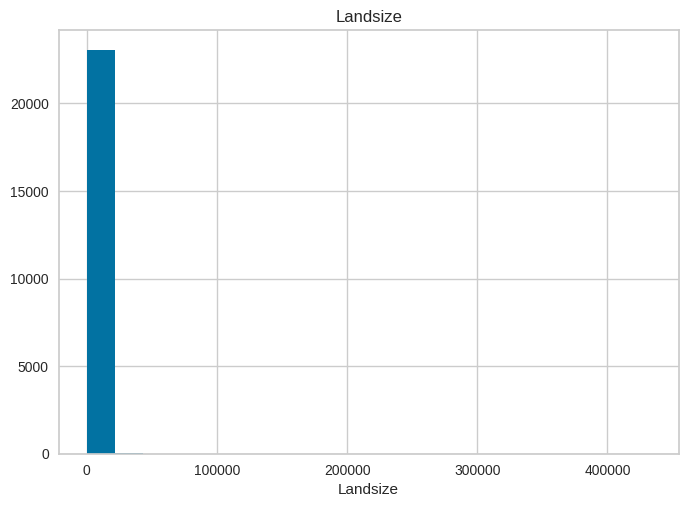

count   13741.000
mean      160.252
std       401.281
min         0.000
5%         56.000
10%        73.000
20%        94.000
30%       109.000
40%       121.000
50%       136.000
60%       153.000
70%       175.000
80%       204.000
90%       258.000
95%       310.000
99%       473.200
max     44515.000
Name: BuildingArea, dtype: float64


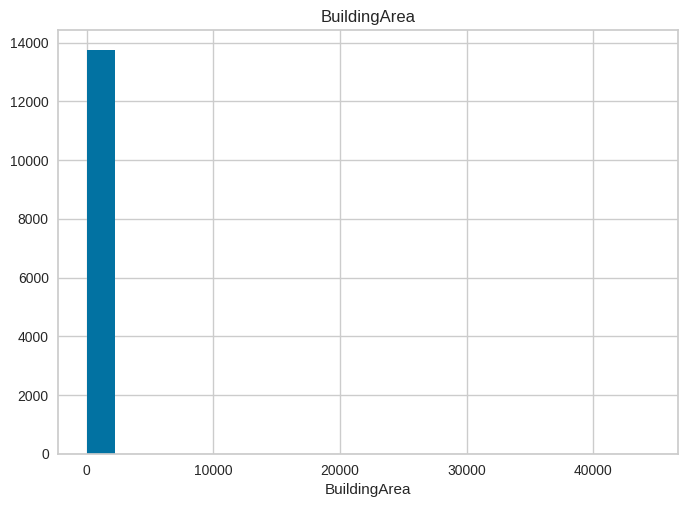

count   26880.000
mean      -37.811
std         0.090
min       -38.190
5%        -37.949
10%       -37.919
20%       -37.879
30%       -37.852
40%       -37.831
50%       -37.808
60%       -37.787
70%       -37.766
80%       -37.740
90%       -37.707
95%       -37.675
99%       -37.586
max       -37.390
Name: Lattitude, dtype: float64


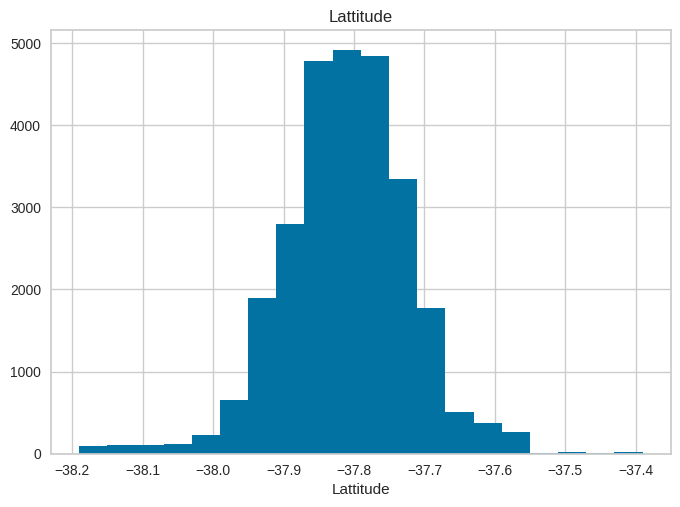

count   26880.000
mean      145.002
std         0.120
min       144.424
5%        144.800
10%       144.868
20%       144.912
30%       144.954
40%       144.988
50%       145.008
60%       145.033
70%       145.058
80%       145.087
90%       145.137
95%       145.188
99%       145.292
max       145.526
Name: Longtitude, dtype: float64


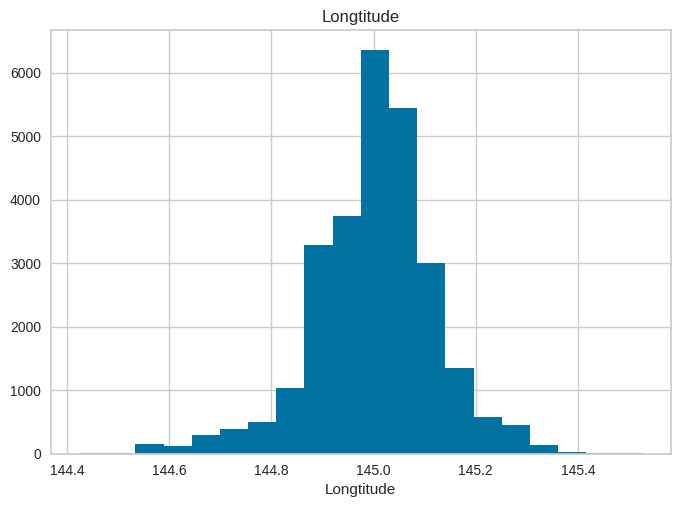

count   34853.000
mean     7572.963
std      4428.132
min        83.000
5%       2185.000
10%      2674.000
20%      3650.000
30%      4836.000
40%      5556.000
50%      6763.000
60%      7809.000
70%      8989.000
80%     10969.000
90%     14577.000
95%     15510.000
99%     21650.000
max     21650.000
Name: Propertycount, dtype: float64


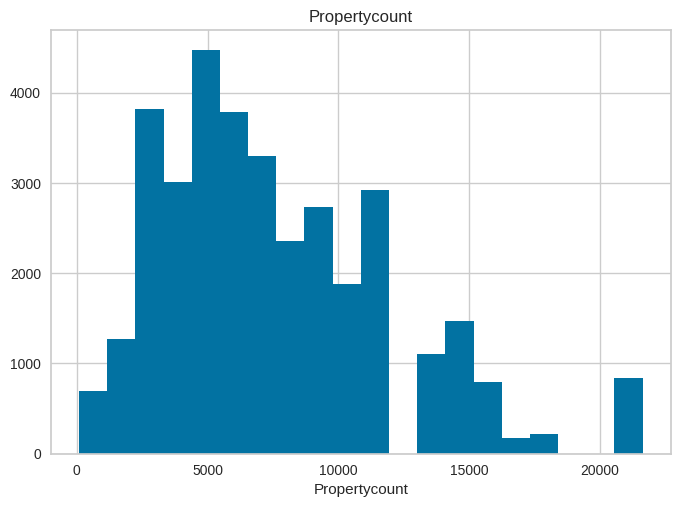

In [141]:
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
def num_summary(dataframe, numerical_col, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [142]:
# 4. Hedef değişkenin Kategorik değişkenlere göre analizi
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": df.groupby(categorical_col)[target].mean()}))

target_summary_with_cat("df", "Price", "Regionname")

                            TARGET_MEAN
Regionname                             
Eastern Metropolitan        1108723.002
Eastern Victoria             714328.205
Northern Metropolitan        861484.047
Northern Victoria            619051.205
South-Eastern Metropolitan   877682.680
Southern Metropolitan       1395928.334
Western Metropolitan         837615.322
Western Victoria             432606.771


In [143]:
# 5. Hedef Değişkenin Sayısal Değişkenler ile Analizi
def target_summary_with_num(dataframe, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

target_summary_with_num(df, "Price", "Propertycount")

              Propertycount
Price                      
85000.000          7570.000
112000.000         8801.000
121000.000         3040.000
131000.000         2379.000
145000.000         6694.500
160000.000        11308.000
170000.000         9744.000
185000.000         3621.500
190000.000         2185.000
200000.000         1996.500
208000.000         5058.000
210000.000         7170.500
211000.000        13240.000
215000.000         2417.000
216000.000        10342.667
220000.000        13316.000
222000.000         6232.000
227000.000         7570.000
230000.000         7816.500
237000.000         7082.000
238000.000         1308.000
240000.000         8999.125
241000.000         6023.333
245000.000         6731.667
247500.000         7217.000
248500.000         7485.000
250000.000         8381.500
252000.000         7082.000
253000.000         9264.000
255000.000         8438.667
256000.000        14042.000
256500.000         4442.000
257500.000         7485.000
260000.000         6

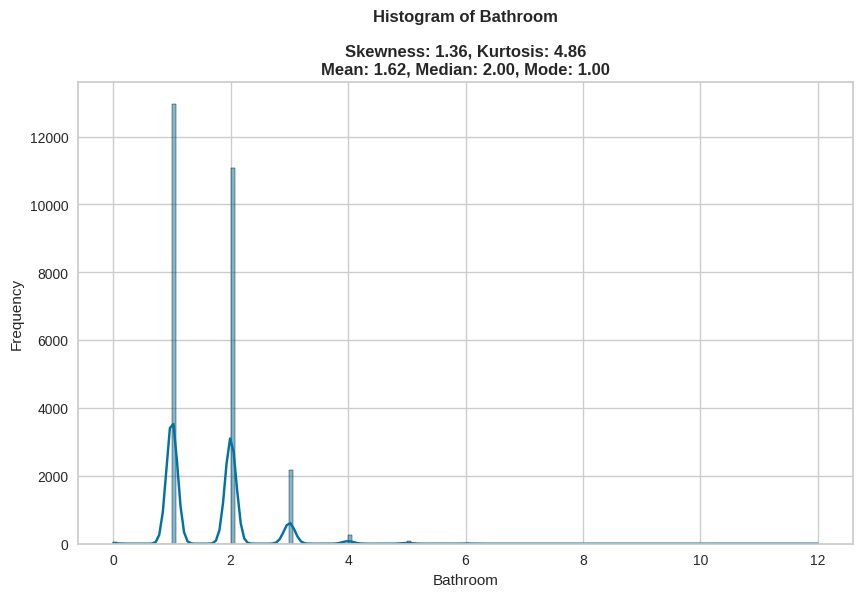

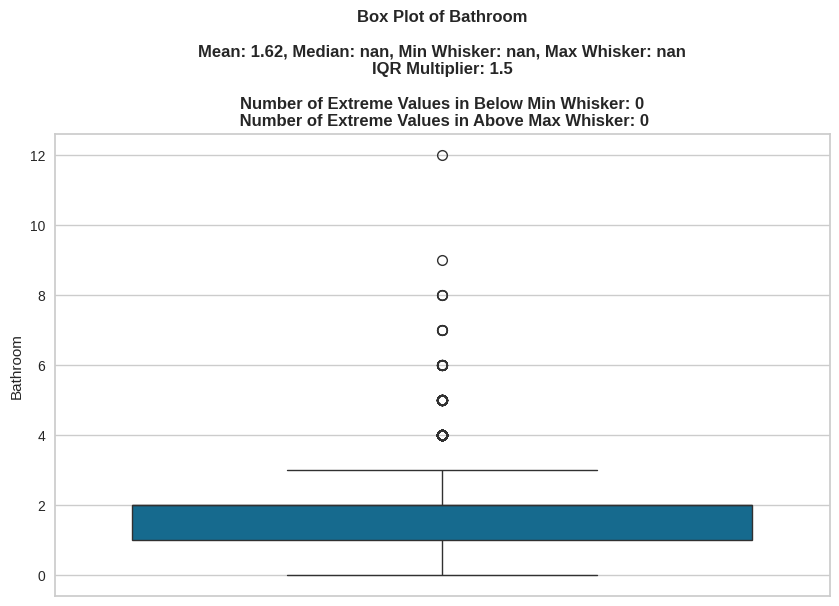

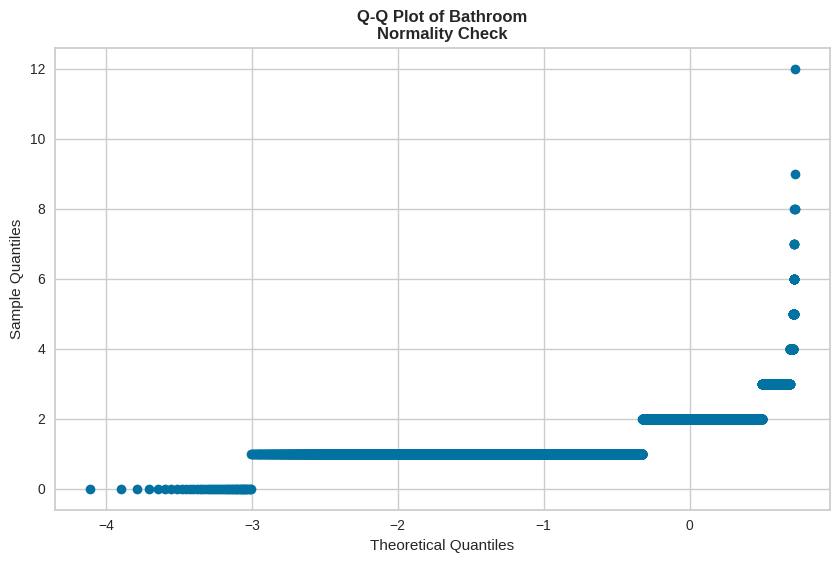

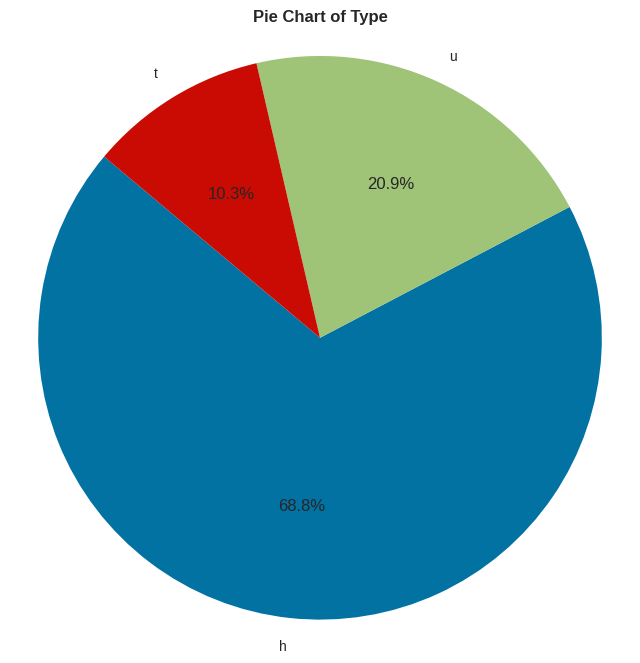

In [144]:
# 6. Görselleştirme Fonksiyonu-1

def visualize_data(df, column, plot_type='histogram', iqr_multiplier=1.5, **kwargs):
    data = df[column]

    if plot_type == 'all':
        plot_types = ['histogram', 'box', 'qq']
        for plot_type in plot_types:
            visualize_data(df, column, plot_type=plot_type, iqr_multiplier=iqr_multiplier, **kwargs)
    else:
        if plot_type == 'histogram':
            plt.figure(figsize=(10, 6))
            sns.histplot(data, kde=True, **kwargs)

            skewness = data.skew()
            kurtosis = data.kurtosis()
            mean = data.mean()
            median = data.median()
            mode = data.mode().iloc[0]
            # Başlığı ve değerleri düzenleyelim
            title = f'Histogram of {column}\n\n'
            title += f'Skewness: {skewness:.2f}, '
            title += f'Kurtosis: {kurtosis:.2f}\n'
            title += f'Mean: {mean:.2f}, '
            title += f'Median: {median:.2f}, '
            title += f'Mode: {mode:.2f}'
            plt.title(title, fontweight='bold')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        elif plot_type == 'box':

            mean = np.mean(data)
            median = np.median(data)
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            upper_whisker = q3 + iqr_multiplier * iqr
            lower_whisker = q1 - iqr_multiplier * iqr
            min_whisker = np.min(data[data >= lower_whisker])
            max_whisker = np.max(data[data <= upper_whisker])

            num_below_min_whisker = np.sum(data < lower_whisker)
            num_above_max_whisker = np.sum(data > upper_whisker)
            plt.figure(figsize=(10, 6))
            sns.boxplot(y=data, **kwargs)
            plt.title(
                f'Box Plot of {column}\n\nMean: {mean:.2f}, Median: {median:.2f}, Min Whisker: {min_whisker:.2f}, Max Whisker: {max_whisker:.2f}\nIQR Multiplier: {iqr_multiplier}\n\nNumber of Extreme Values in Below Min Whisker: {num_below_min_whisker}\n Number of Extreme Values in Above Max Whisker: {num_above_max_whisker}',
                fontweight="bold")
            plt.ylabel(column)
            plt.show()
        elif plot_type == 'qq':

            plt.figure(figsize=(10, 6))
            stats.probplot(data, dist="norm", plot=plt)
            plt.title(f'Q-Q Plot of {column}\nNormality Check', fontweight='bold')
            plt.xlabel('Theoretical Quantiles')
            plt.ylabel('Sample Quantiles')
            plt.show()
        elif plot_type == 'bar':
            value_counts = data.value_counts()
            x = value_counts.index
            y = value_counts.values
            total_height = sum(y)
            percentages = [(count / total_height) * 100 for count in y]
            fig, ax = plt.subplots(figsize=(10, 6))
            bars = ax.barh(x, percentages, **kwargs)  # Horizontal bar chart
            plt.title(f'Bar Chart of {column}', fontweight='bold')
            plt.xlabel('Percentage')
            plt.ylabel(column)
            for bar, percentage in zip(bars, percentages):
                width = bar.get_width()
                ax.annotate(f'{percentage:.2f}%', xy=(width, bar.get_y() + bar.get_height() / 2),
                            xytext=(3, 0), textcoords='offset points', va='center')
            plt.show()
        elif plot_type == 'pie':
            value_counts = data.value_counts()
            labels = value_counts.index
            sizes = value_counts.values
            plt.figure(figsize=(8, 8))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, **kwargs)
            plt.title(f'Pie Chart of {column}', fontweight='bold')
            plt.axis('equal')
            plt.show()


visualize_data(df, "Bathroom", plot_type='all', iqr_multiplier=1.5)
visualize_data(df, "Type", plot_type='pie', iqr_multiplier=1.5)

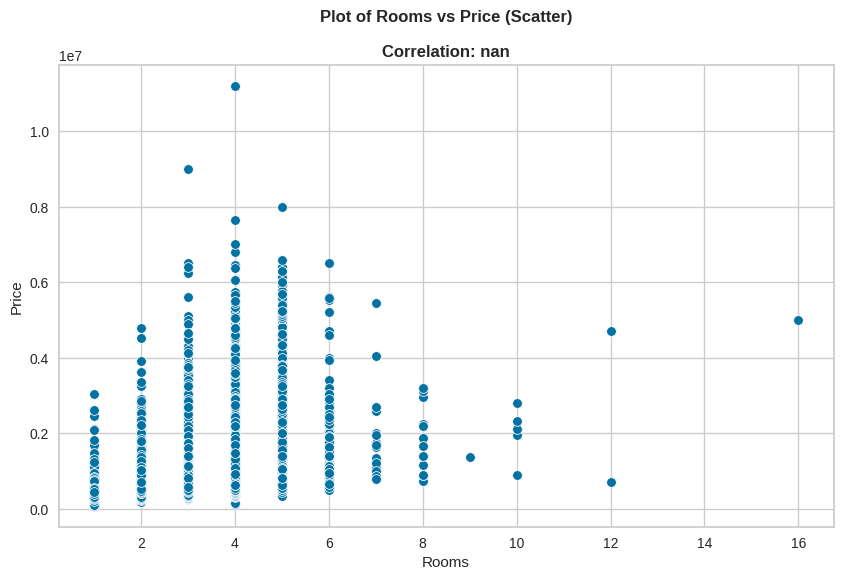

In [145]:
# 7. Görselleştirme Fonksiyonu-2

def scatter_or_joint_plot(df, x_col, y_col, title=None, x_label=None, y_label=None, kind='scatter', **kwargs):
    if title is None:
        title = f'Plot of {x_col} vs {y_col}'
    if x_label is None:
        x_label = x_col
    if y_label is None:
        y_label = y_col

    plt.figure(figsize=(10, 6))
    corr_coefficient = np.corrcoef(df[x_col], df[y_col])[0, 1]

    if kind == 'scatter':
        sns.scatterplot(data=df, x=x_col, y=y_col, **kwargs)
        title_with_corr = f'{title} (Scatter)\n\nCorrelation: {corr_coefficient:.2f}'
        plt.title(title_with_corr, fontweight='bold')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
    elif kind == 'joint':
        g = sns.jointplot(x=x_col, y=y_col, data=df, **kwargs)
        g.fig.suptitle(f'{title}', fontweight='bold', y=1.02)
        g.ax_joint.set_xlabel(x_label)
        g.ax_joint.set_ylabel(y_label)
        g.ax_marg_x.set_title(f'Correlation: {corr_coefficient:.2f}', fontweight='bold')
        plt.subplots_adjust(top=0.9)

    plt.show()

scatter_or_joint_plot(df, "Rooms", "Price", title=None, x_label="Rooms", y_label="Price", kind='scatter')


<Axes: >

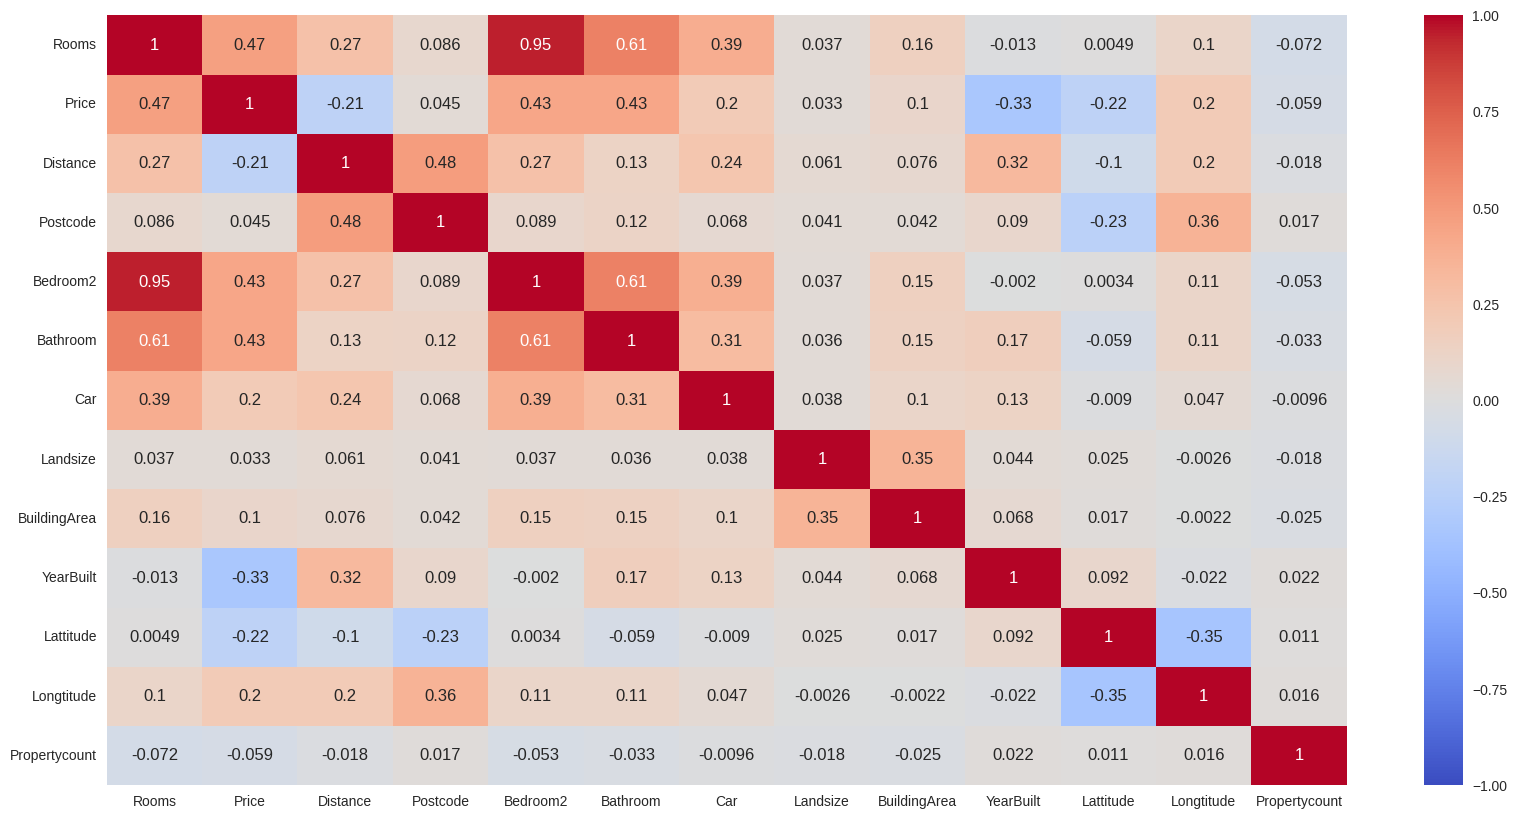

In [146]:
# 8. Korelasyon Analizi (Analysis of Correlation)

def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    num_cols = df.select_dtypes(include=['number']).columns
    dataframe_numeric = df[num_cols]
    corr = dataframe_numeric.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    df.drop(drop_list, axis=1, inplace=True)  # Sütunları düşür
    return dataframe

#Heatmap:
df_numeric = df.select_dtypes(include="number")
plt.figure(figsize=(20, 10))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

Rooms            0.465
Price            1.000
Distance        -0.211
Postcode         0.045
Bedroom2         0.430
Bathroom         0.430
Car              0.202
Landsize         0.033
BuildingArea     0.101
YearBuilt       -0.333
Lattitude       -0.216
Longtitude       0.198
Propertycount   -0.059
dtype: float64


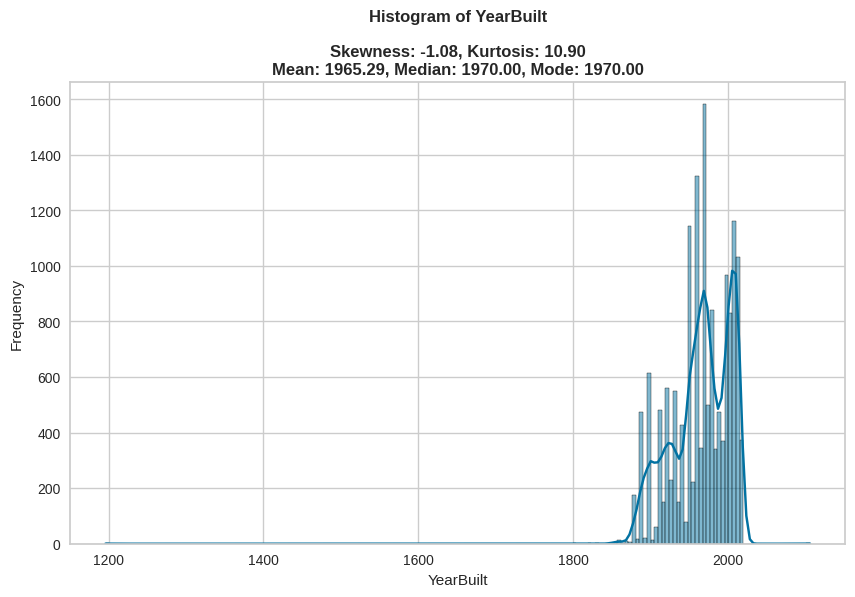

In [147]:
#Nümerik sütunların Price ile korelasyonunun görselleştirilmesi:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numeric_columns].corrwith(df['Price'])
print(correlations)

visualize_data(df, "YearBuilt", plot_type="histogram")

Rooms            0.156
Price            0.101
Distance         0.076
Postcode         0.042
Bedroom2         0.154
Bathroom         0.148
Car              0.104
Landsize         0.355
BuildingArea     1.000
YearBuilt        0.068
Lattitude        0.017
Longtitude      -0.002
Propertycount   -0.025
dtype: float64


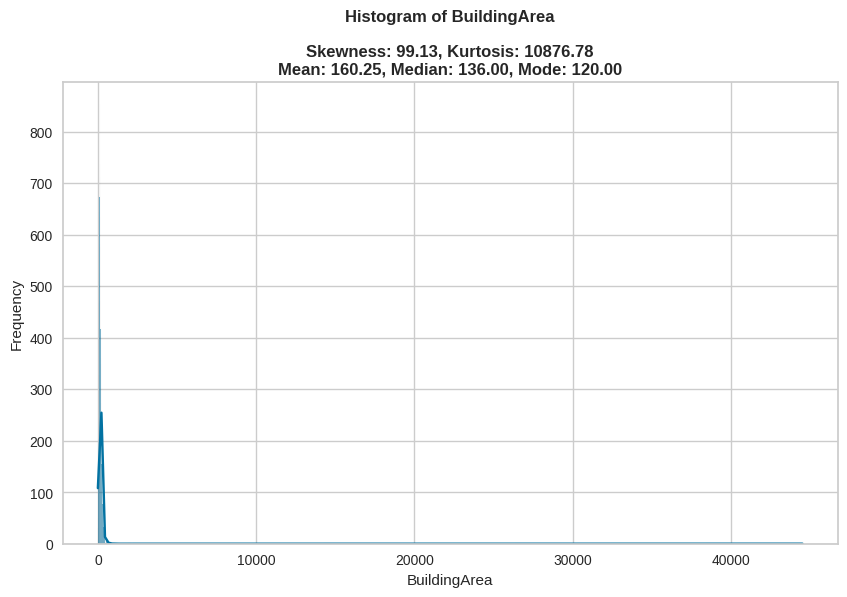

In [148]:
df['BuildingArea'] = pd.to_numeric(df['BuildingArea'], errors='coerce')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numeric_columns].corrwith(df['BuildingArea'])
print(correlations)

visualize_data(df, "BuildingArea", plot_type="histogram")


Rooms           -0.013
Price           -0.333
Distance         0.323
Postcode         0.090
Bedroom2        -0.002
Bathroom         0.168
Car              0.129
Landsize         0.044
BuildingArea     0.068
YearBuilt        1.000
Lattitude        0.092
Longtitude      -0.022
Propertycount    0.022
dtype: float64


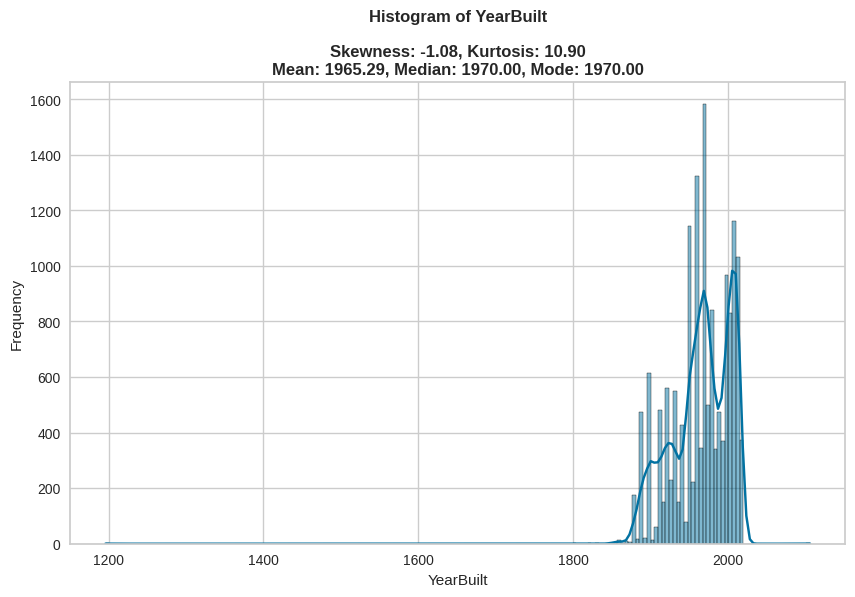

In [149]:
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numeric_columns].corrwith(df['YearBuilt'])
print(correlations)

visualize_data(df, "YearBuilt", plot_type="histogram")

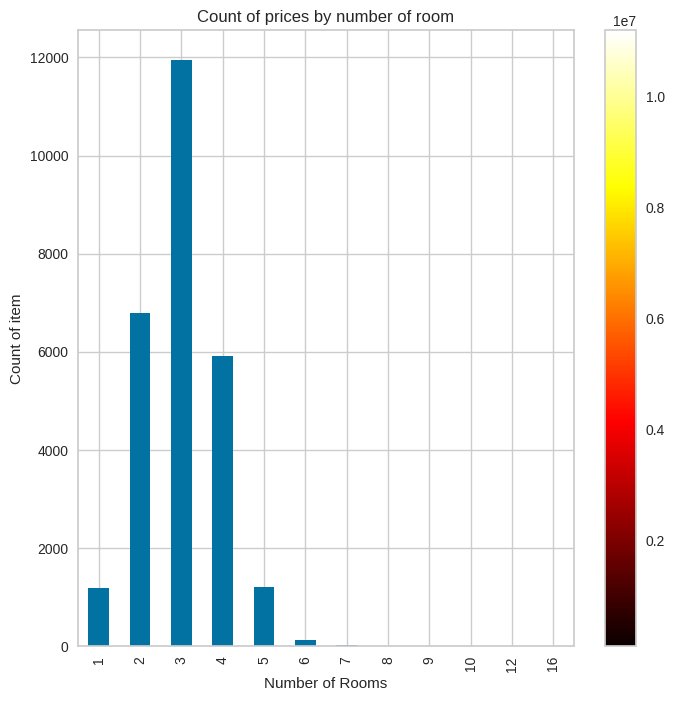

<Axes: xlabel='count', ylabel='Regionname'>

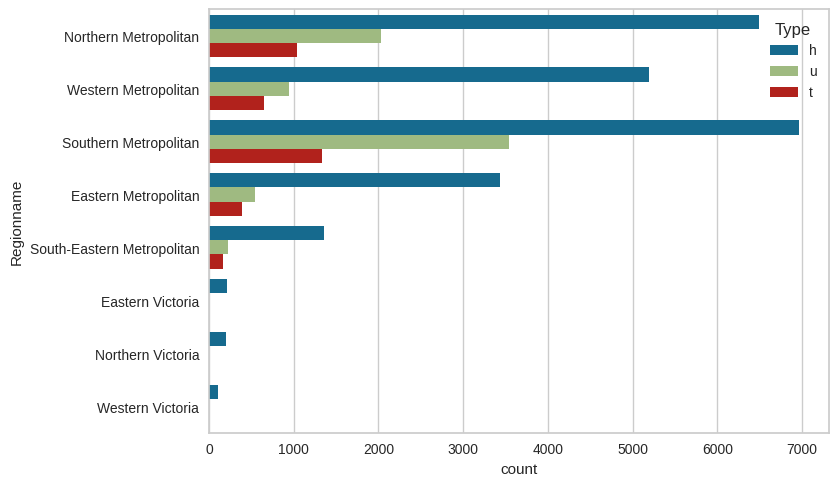

In [150]:
# 9. Melbourne Housing Map

#Her bir nokta, bir evin konumunu temsil eder. Noktaların renkleri evlerin fiyatını gösterir;
#daha yüksek fiyatlar daha sıcak renklerle (örneğin kırmızı) gösterilir.
plt.figure(figsize=(8, 8))
plt.scatter(df['Lattitude'], df['Longtitude'], c=df['Price'], cmap='hot')
plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Melbourne  Housing Map")

#her bir oda sayısına sahip evlerin sayısını gösterir.
df.groupby(["Rooms"])['Price'].count().plot(kind="bar")
plt.xlabel("Number of Rooms")
plt.ylabel("Count of item")
plt.title("Count of prices by number of room")
plt.show()

sns.countplot(y='Regionname', hue='Type', data=df)


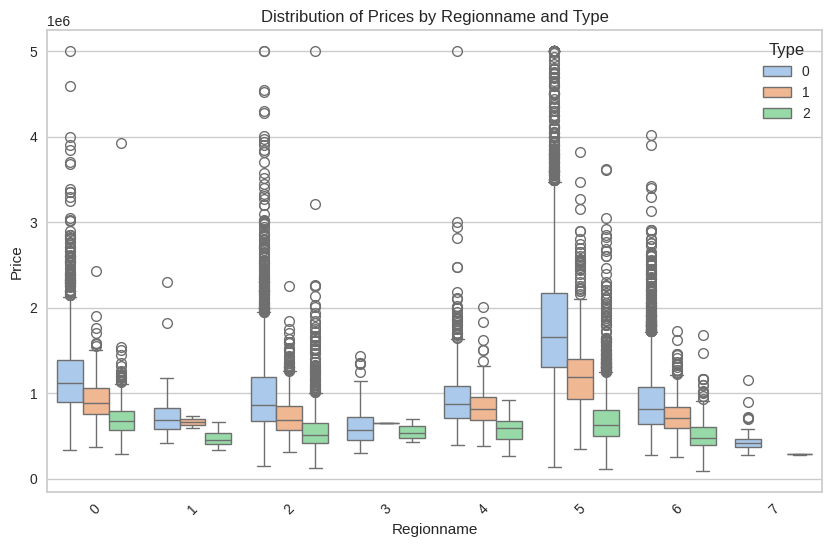

In [185]:
#h - ev,yazlık,villa, yarı,teras; ,u - birim, çift yönlü; , t - şehir evi;

light_palette = "pastel"
plt.figure(figsize=(10, 6))
# Kutu grafiği
sns.boxplot(x='Regionname', y='Price', hue='Type', data=df, palette=light_palette, linewidth=1)

plt.title('Distribution of Prices by Regionname and Type')
plt.xlabel('Regionname')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.legend(title='Type')
plt.show()


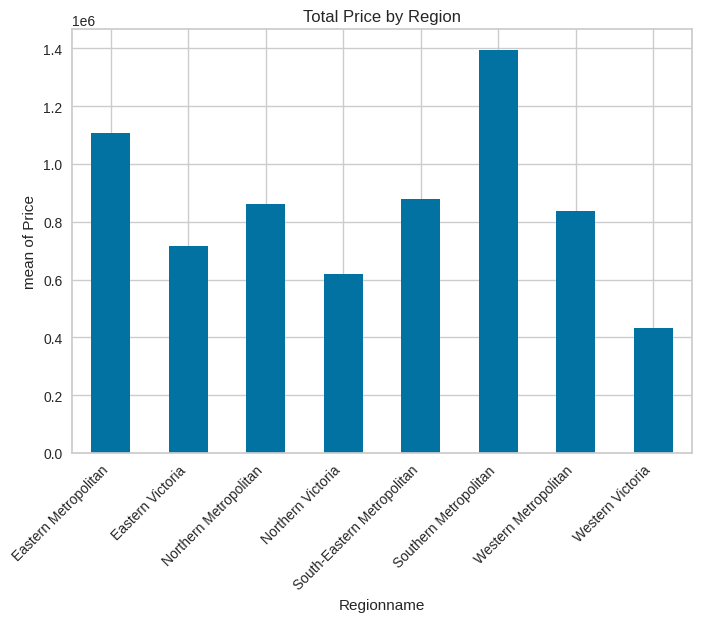

Regionname
Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4376
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: count, dtype: int64


In [152]:
#Bu grafik, farklı bölgelerdeki ev fiyatlarının ortalamasını gösterir.
df.groupby(["Regionname"])['Price'].mean().plot(kind='bar')
plt.xlabel("Regionname")
plt.ylabel("mean of Price")
plt.title("Total Price by Region")
plt.xticks(rotation=45, ha='right')
plt.show()

region_counts = df['Regionname'].value_counts()
print(region_counts)

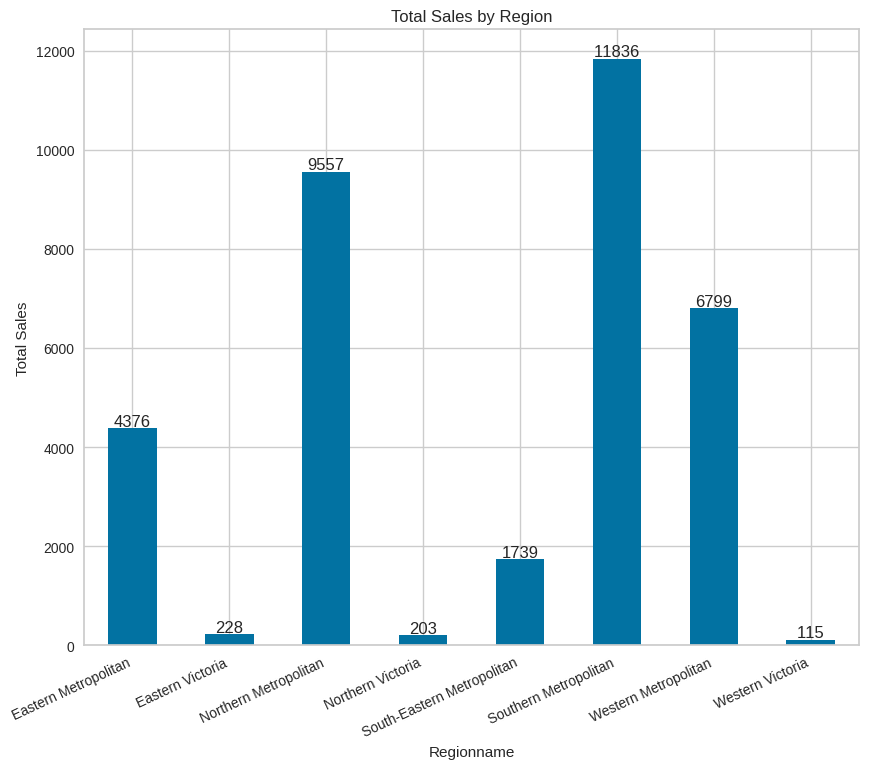

In [153]:
#Bu grafik, farklı bölgelerdeki evlerin toplam satış sayılarını karşılaştırarak
#hangi bölgelerin daha çok veya daha az satılan evlere sahip olduğunu gösterir.
plt.figure(figsize=(10, 8))
ax = df.groupby(["Regionname"]).size().plot(kind='bar')
plt.xlabel("Regionname")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=25, ha='right')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

column name    :  Price
--------------------------------
per_of_nulls   :  % 21.83
num_of_nulls   :  7609
num_of_uniques :  2872
shape_of_df    :  (34856, 21)
--------------------------------
Price
NaN             7609
600000.000       235
1100000.000      235
650000.000       219
800000.000       217
1300000.000      210
1000000.000      205
1200000.000      204
700000.000       197
750000.000       194
900000.000       191
850000.000       176
950000.000       172
1250000.000      158
1500000.000      153
500000.000       153
1400000.000      150
1150000.000      149
550000.000       141
1050000.000      139
780000.000       136
770000.000       131
720000.000       128
1350000.000      125
630000.000       124
730000.000       124
620000.000       123
580000.000       123
680000.000       122
820000.000       120
640000.000       120
660000.000       119
670000.000       118
760000.000       118
880000.000       115
810000.000       114
860000.000       112
920000.000       111
5200

count      27247.000
mean     1050173.345
std       641467.130
min        85000.000
25%       635000.000
50%       870000.000
75%      1295000.000
max     11200000.000
Name: Price, dtype: float64

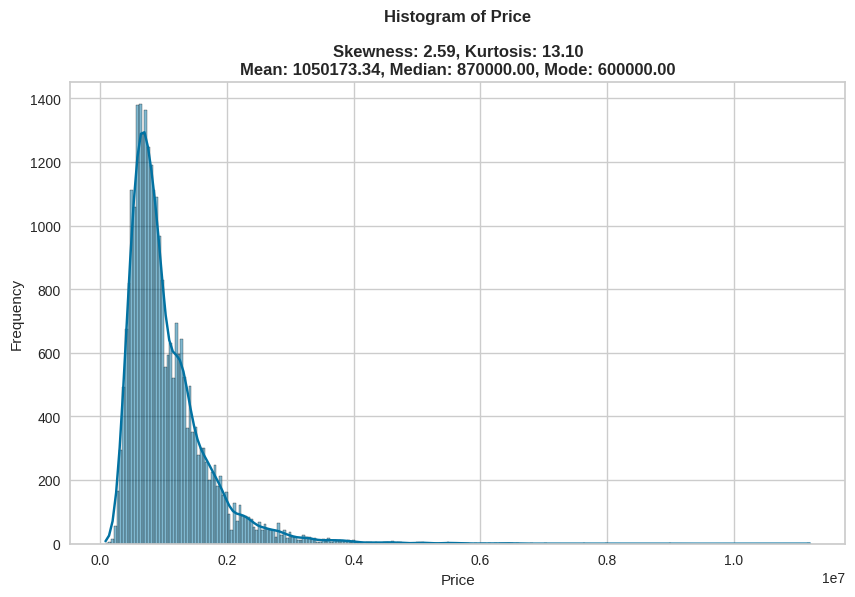

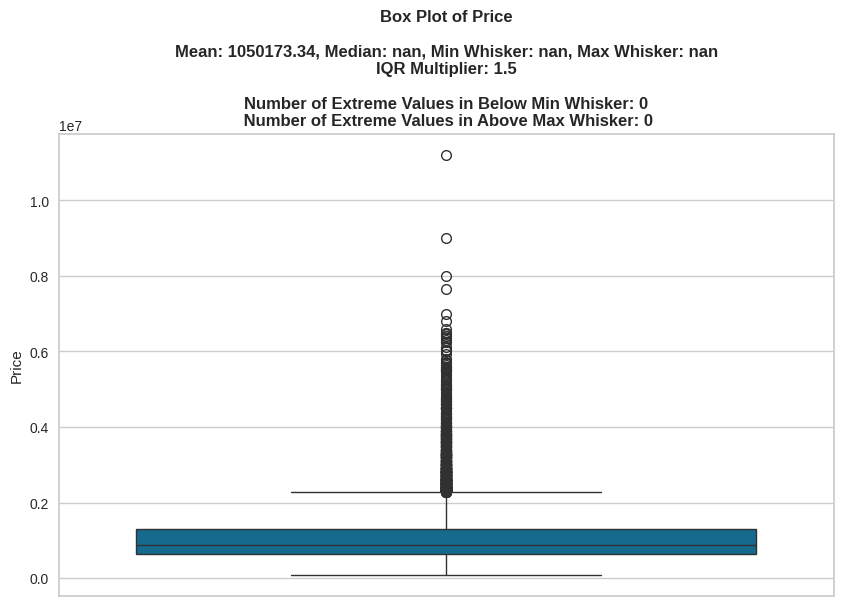

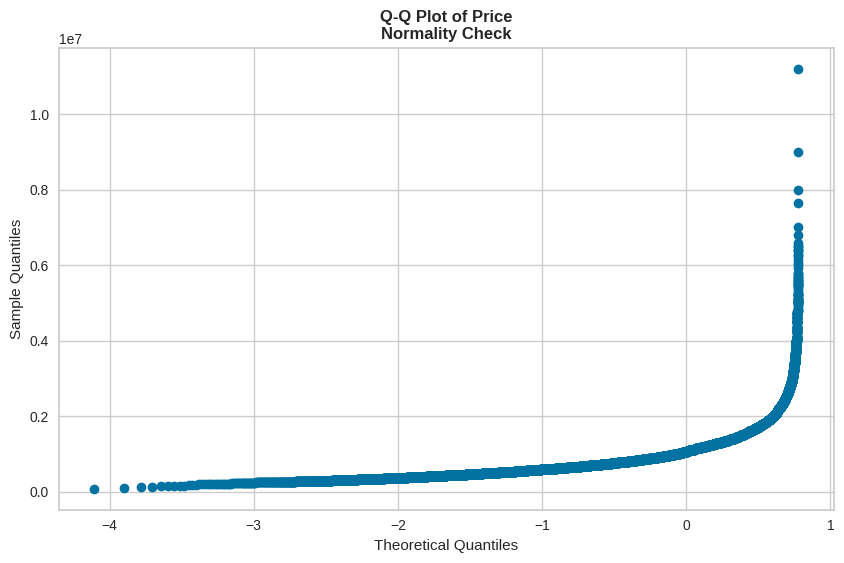

Index([4378, 29669, 17529, 3063, 3290, 11859, 12947, 21012, 14380, 11848, 13895, 11861, 11602, 13970, 20888, 4443, 14470, 6688, 11588, 9505], dtype='int64')


In [154]:
# 10. İstatistiksel Bakış

# İlk bakış fonksiyonunu kullanarak fiyat sütununu inceleyelim
first_look(df, "Price")

# Fiyat sütununun istatistiklerini gösterelim
display(df.Price.describe())

# Fiyat sütununu çeşitli grafiklerle görselleştirelim
visualize_data(df, "Price", plot_type="all")

# En yüksek fiyatları içeren ilk 20 gözlemi görelim
df.sort_values(by=["Price"], ascending=False)["Price"].head(20)

# En yüksek fiyatı olan gözlemin tüm bilgilerini gösterelim
var = df[df["Price"] == 11200000.0].T

# En düşük fiyatları içeren ilk 20 gözlemin indekslerini seçelim
low_prices_indices = df.sort_values(by=["Price"], ascending=True)["Price"].head(20).index
print(low_prices_indices)

In [155]:
# ÖZELLİK MÜHENDİSLİĞİ (FEATURE ENGİNEERİNG)

# 1. Outliers (Aykırı Değerler)
# 2. Missing Values (Eksik Değerler)
# 3. Feature Extraction (Özellik Çıkarımı)
# 4. Label Encoding
# 5. Feature Scaling (Özellik Ölçeklendirme)

Rooms sütunu için alt ve üst limit değerleri: (-2.5, 9.5)
Price sütunu için alt ve üst limit değerleri: (-2337500.0, 5002500.0)
Distance sütunu için alt ve üst limit değerleri: (-30.3, 57.7)
Postcode sütunu için alt ve üst limit değerleri: (2731.5, 3487.5)
Bedroom2 sütunu için alt ve üst limit değerleri: (-2.5, 9.5)
Bathroom sütunu için alt ve üst limit değerleri: (-2.0, 6.0)
Car sütunu için alt ve üst limit değerleri: (-6.0, 10.0)
Landsize sütunu için alt ve üst limit değerleri: (-1501.5, 2502.5)
BuildingArea sütunu için alt ve üst limit değerleri: (-325.0, 691.0)
YearBuilt sütunu için alt ve üst limit değerleri: (1730.5, 2182.5)
Lattitude sütunu için alt ve üst limit değerleri: (-38.358490750000016, -37.26520875)
Longtitude sütunu için alt ve üst limit değerleri: (144.21863175000004, 145.76914974999994)
Propertycount sütunu için alt ve üst limit değerleri: (-17802.5, 35497.5)


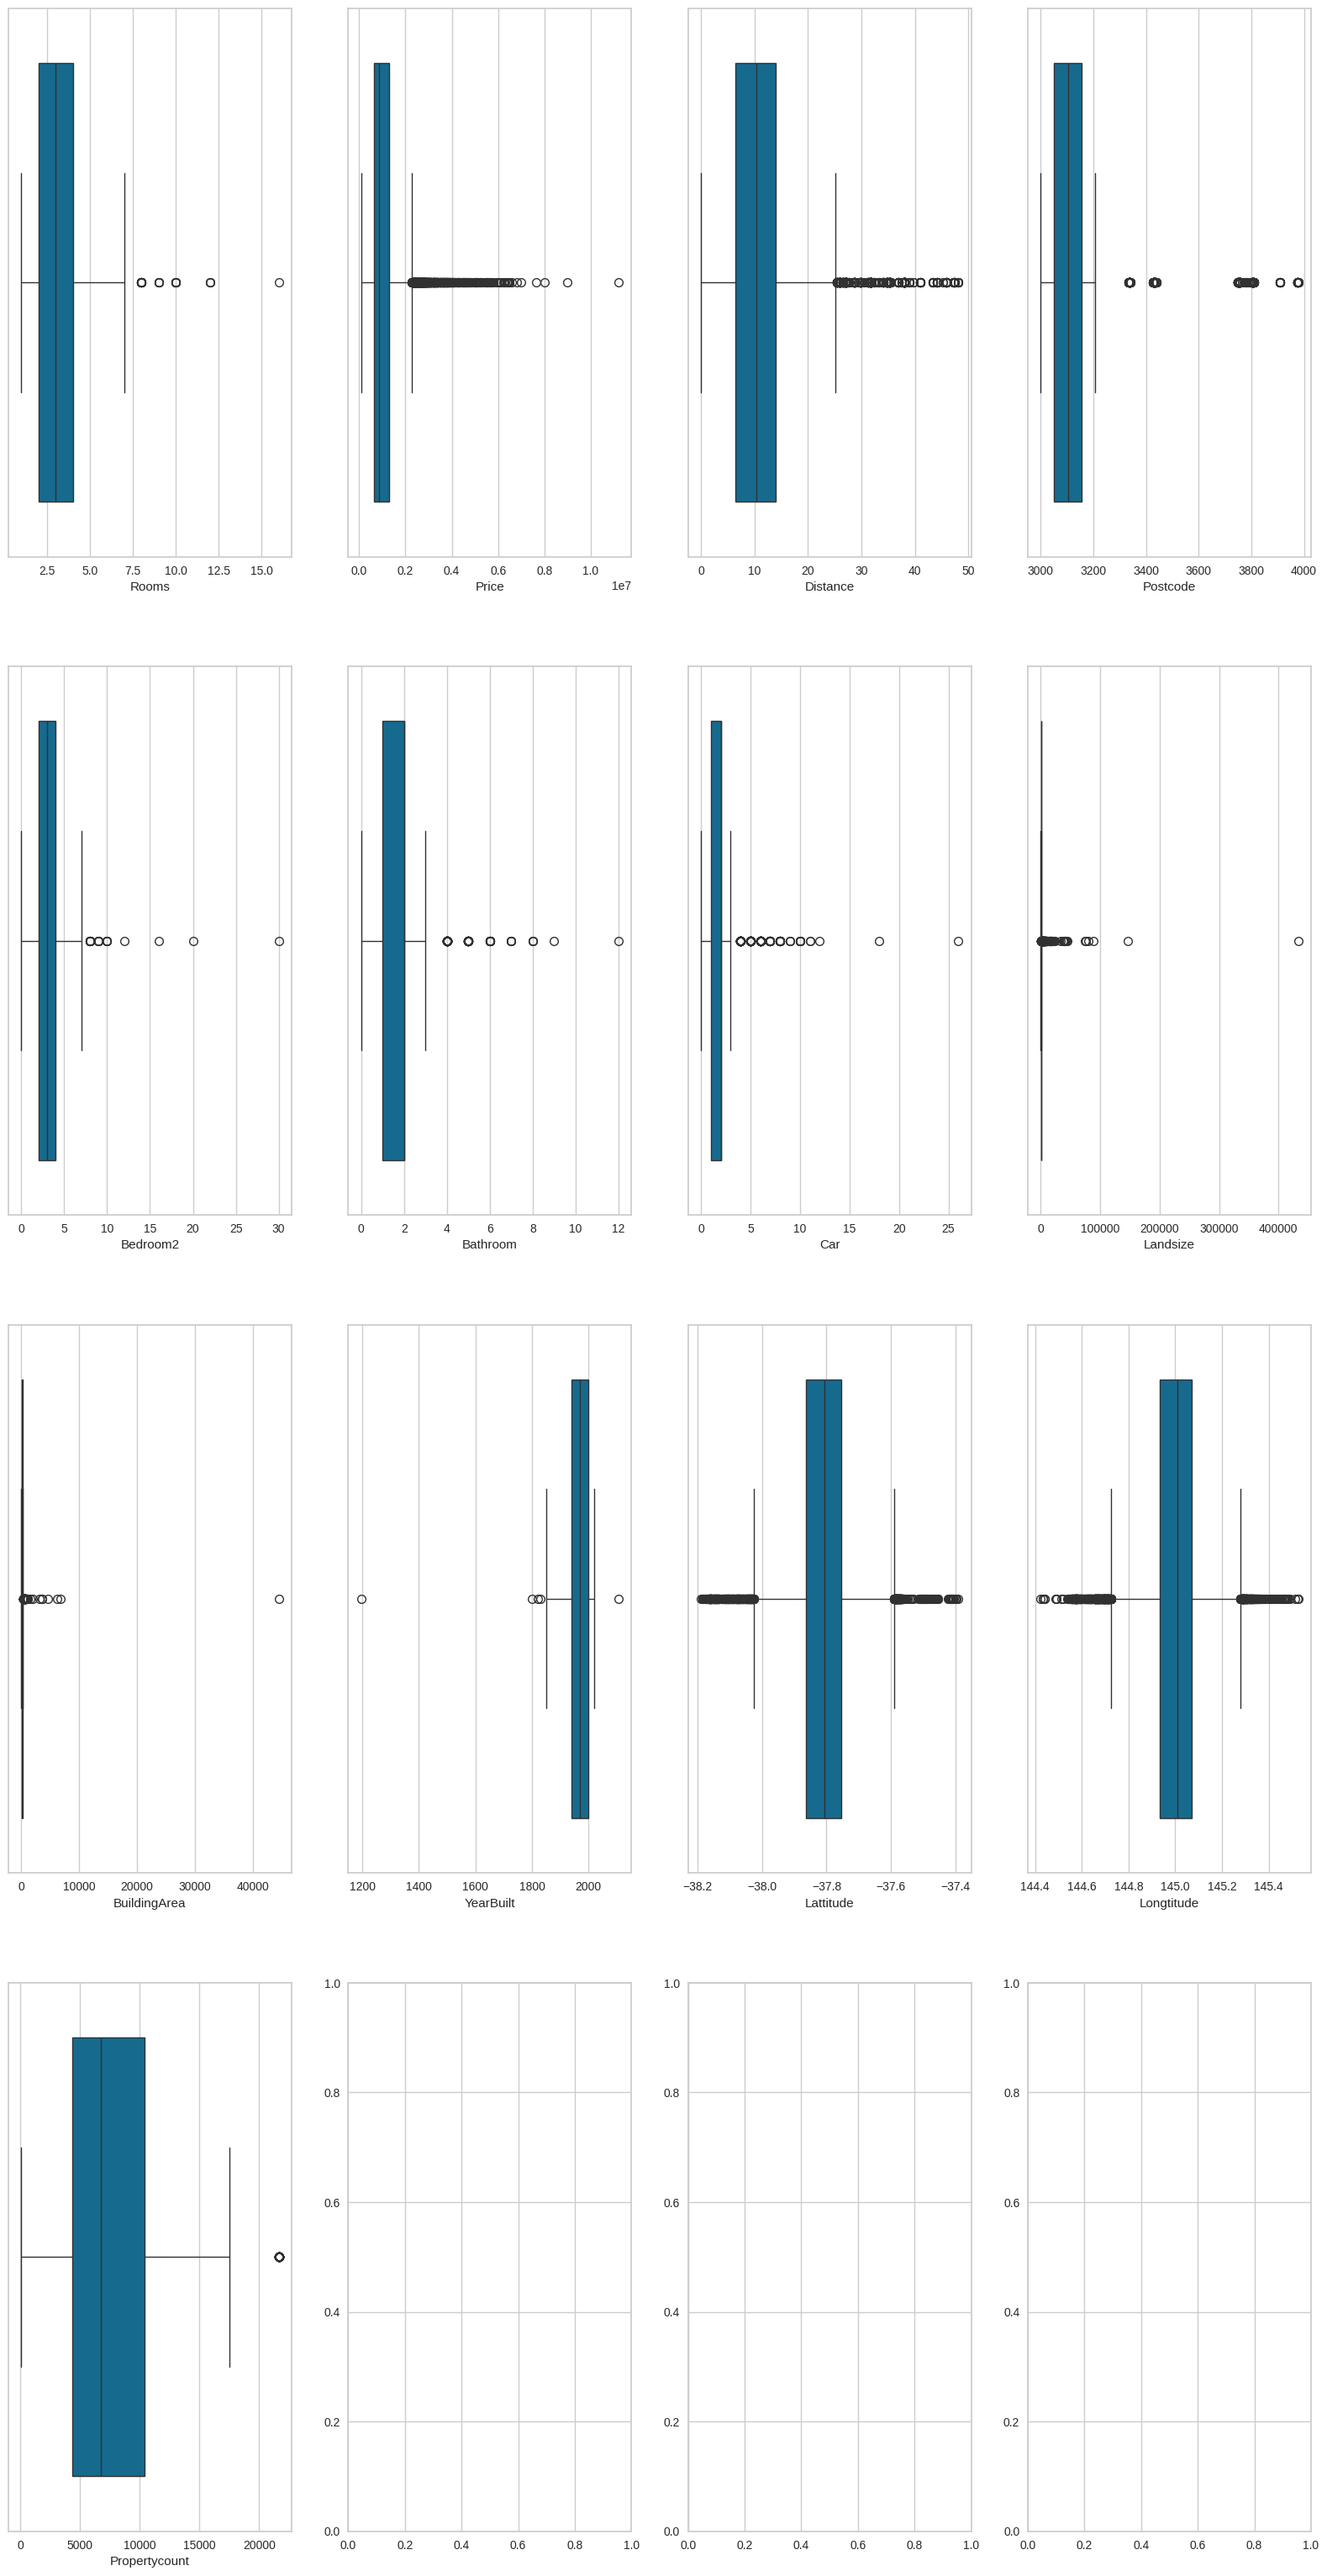

Price sütunu için alt ve üst limit değerleri: (-2337500.0, 5002500.0)
Price True
Landsize sütunu için alt ve üst limit değerleri: (-1501.5, 2502.5)
Landsize True
BuildingArea sütunu için alt ve üst limit değerleri: (-325.0, 691.0)
BuildingArea True
Lattitude sütunu için alt ve üst limit değerleri: (-38.358490750000016, -37.26520875)
Lattitude False
Longtitude sütunu için alt ve üst limit değerleri: (144.21863175000004, 145.76914974999994)
Longtitude False
Propertycount sütunu için alt ve üst limit değerleri: (-17802.5, 35497.5)
Propertycount False


In [156]:
# 1. Outliers (Aykırı Değerler)

# a) Aykırı değer ve gözlem analizi
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95, ax=None, plot=False):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns

    print(f"{col_name} sütunu için alt ve üst limit değerleri: ({low_limit}, {up_limit})")
    if plot:
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 6))  # Tek bir tablo için figür ve eksen oluştur
        sns.boxplot(x=dataframe[col_name], data=dataframe, ax=ax)
    return low_limit, up_limit

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Grafik oluşturma ve outlier analizi yapma
fig, axs = plt.subplots((len(numerical_columns) + 3) // 4, 4, figsize=(20, len(numerical_columns) * 3))

for i, col in enumerate(numerical_columns):
    outlier_thresholds(df, col, ax=axs[i // 4, i % 4], plot=True)  # Sütun ve satır index
plt.show()

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

In [157]:
# b) Baskılama yöntemi
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

Price sütunu için alt ve üst limit değerleri: (-2337500.0, 5002500.0)
Price True
Price sütunu için alt ve üst limit değerleri: (-2337500.0, 5002500.0)
Price sütunu için alt ve üst limit değerleri: (-2337500.0, 5002500.0)
Landsize sütunu için alt ve üst limit değerleri: (-1501.5, 2502.5)
Landsize True
Landsize sütunu için alt ve üst limit değerleri: (-1501.5, 2502.5)
Landsize sütunu için alt ve üst limit değerleri: (-1501.5, 2502.5)
BuildingArea sütunu için alt ve üst limit değerleri: (-325.0, 691.0)
BuildingArea True
BuildingArea sütunu için alt ve üst limit değerleri: (-325.0, 691.0)
BuildingArea sütunu için alt ve üst limit değerleri: (-325.0, 691.0)
Lattitude sütunu için alt ve üst limit değerleri: (-38.358490750000016, -37.26520875)
Lattitude False
Lattitude sütunu için alt ve üst limit değerleri: (-38.358490750000016, -37.26520875)
Longtitude sütunu için alt ve üst limit değerleri: (144.21863175000004, 145.76914974999994)
Longtitude False
Longtitude sütunu için alt ve üst limit de

In [158]:
# 2. Missing Values (Eksik Değerler)

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

df.isnull().sum()

               n_miss  ratio
BuildingArea    21115 60.580
YearBuilt       19306 55.390
Landsize        11810 33.880
Car              8728 25.040
Bathroom         8226 23.600
Bedroom2         8217 23.570
Lattitude        7976 22.880
Longtitude       7976 22.880
Price            7609 21.830
CouncilArea         3  0.010
Regionname          3  0.010
Propertycount       3  0.010
Distance            1  0.000
Postcode            1  0.000


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

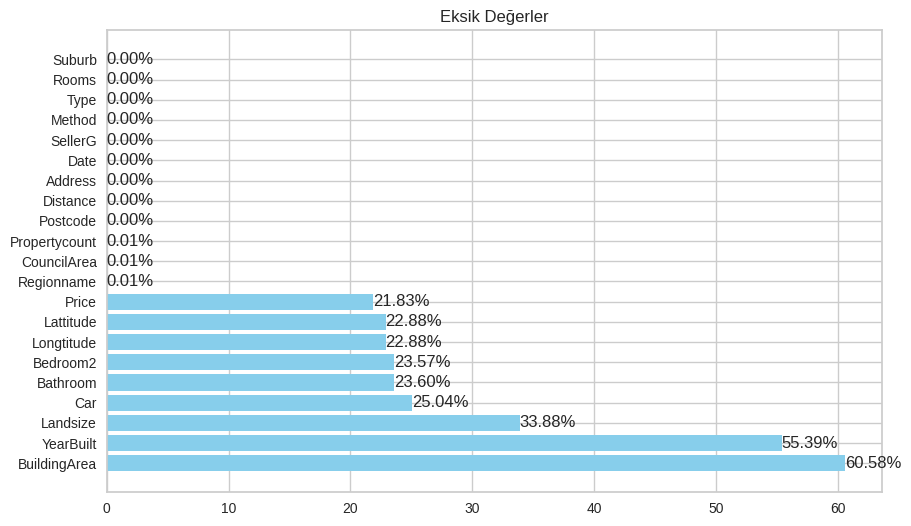

In [159]:
# Eksik değer görselleştirme
def missing_values_horizontal_bar(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

#Eksik değerlerin yatay bar grafiğini oluşturma
    plt.figure(figsize=(10, 6))

    bars = plt.barh(missing_values.index, missing_values['Missing_Percent'], color='skyblue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Eksik Değerler')

# Yatay çubukların yanına yüzdelik değerlerini yazdırma
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='left', va='center')

    plt.show()

missing_values_horizontal_bar(df)

In [160]:
# Bağımlı değişkendeki nan değerleri drop ettik
df.dropna(subset=['Price'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(27247, 21)

In [161]:
obj_cats = df.select_dtypes(['object']).columns
for colname in obj_cats:
    df[colname] = df[colname].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  float64 
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 15  YearBuilt      12084 non-null  float64 
 16  CouncilArea    27244 non-null  category
 17  Lattitude      20993 non-null  

In [162]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 250 and df[col].dtype in ["int64", "float64"]]
for colname in num_but_cat:
    df[colname] = df[colname].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  category
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  category
 9   Postcode       27246 non-null  category
 10  Bedroom2       20806 non-null  category
 11  Bathroom       20800 non-null  category
 12  Car            20423 non-null  category
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 15  YearBuilt      12084 non-null  category
 16  CouncilArea    27244 non-null  category
 17  Lattitude      20993 non-null  

In [163]:
#Kategorik değişkenleri mode ile nümerik değişkenleri ise median ile dolduralım
categorical_columns = df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 19]]
numerical_columns = df.iloc[:, [4, 13, 14, 17, 18, 20]]

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

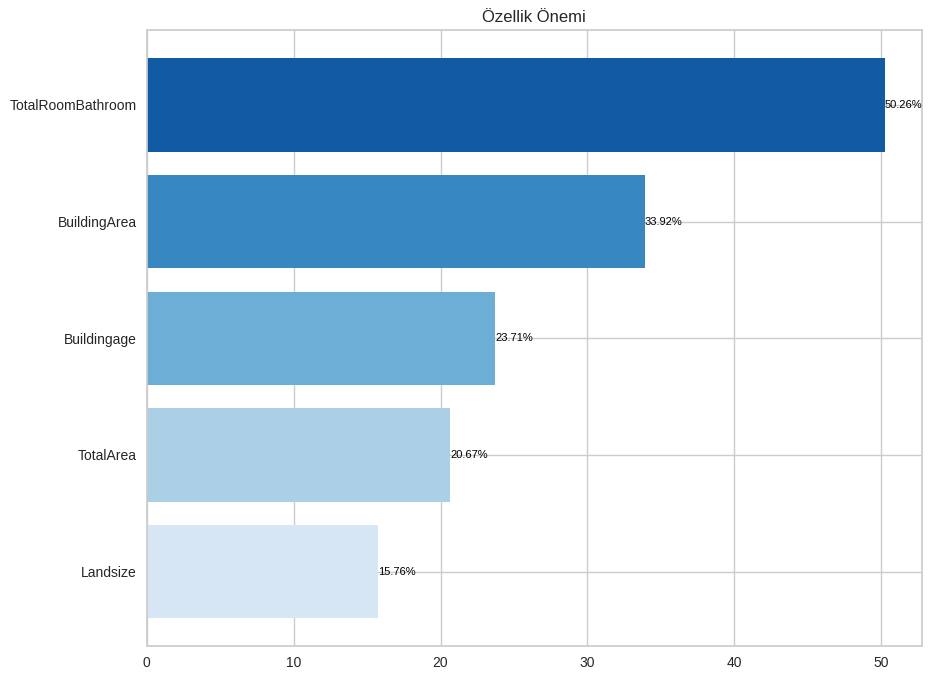

In [164]:
# 3. Feature Extraction (Özellik Çıkarımı)

# Eklenen Kolonlar
df['YearBuilt'] = df['YearBuilt'].astype(int)
df["Buildingage"] = 2024 - df["YearBuilt"]
df.drop("YearBuilt", axis=1, inplace=True)

df['Rooms'] = df['Rooms'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)

df["TotalRoomBathroom"] = df["Rooms"] + df["Bathroom"]
df["TotalArea"] = df['Landsize'] + df['BuildingArea']

# Çıkarılan kolonlar
exclude_columns = ['Propertycount', 'Lattitude', 'Longtitude', 'Postcode', 'SellerG']

# Korelasyonu hesaplayacak sütunları seçin (str sütunlar hariç)
selected_columns = [col for col in num_cols if col != 'Price' and col not in exclude_columns]

# Her bir sütunun fiyat üzerindeki etkisini hesaplayın
price_effects = {}
for col in selected_columns:
    correlation = df[col].corr(df['Price'])
    if not np.isnan(correlation):
        price_effects[col] = correlation * 100

# Yeni eklenen sütunların etkisini hesaplayın
new_columns = ['Buildingage', 'TotalRoomBathroom', 'TotalArea']
for col in new_columns:
    correlation = df[col].corr(df['Price'])
    if not np.isnan(correlation):
        price_effects[col] = correlation * 100

# Sonuçları bir DataFrame'e dönüştürün
effect_df = pd.DataFrame(list(price_effects.items()), columns=['Feature', 'Effect'])
effect_df.sort_values(by='Effect', ascending=False, inplace=True)

# Fiyat üzerindeki etkileri bar grafiği ile gösterin
plt.figure(figsize=(10, 8))
bars = plt.barh(effect_df['Feature'], effect_df['Effect'], color=sns.color_palette("Blues_r", len(effect_df)))  # Bar renkleri koyudan açığa mavi
plt.xlabel('')
plt.title('Özellik Önemi')
plt.gca().invert_yaxis()  # Sütunları büyükten küçüğe sırala

# Barların yanına yüzdelik değerleri yazdırın (daha küçük font)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}%",
             va='center', ha='left', color='black', fontsize=8)

plt.show()


In [165]:
# 4. Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in categorical_columns:
    if column != "YearBuilt":
        df[column] = le.fit_transform(df[column])



In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Suburb             27247 non-null  int64  
 1   Address            27247 non-null  int64  
 2   Rooms              27247 non-null  int64  
 3   Type               27247 non-null  int64  
 4   Price              27247 non-null  float64
 5   Method             27247 non-null  int64  
 6   SellerG            27247 non-null  int64  
 7   Date               27247 non-null  int64  
 8   Distance           27247 non-null  int64  
 9   Postcode           27247 non-null  int64  
 10  Bedroom2           27247 non-null  int64  
 11  Bathroom           27247 non-null  int64  
 12  Car                27247 non-null  int64  
 13  Landsize           27247 non-null  float64
 14  BuildingArea       27247 non-null  float64
 15  CouncilArea        27247 non-null  int64  
 16  Lattitude          272

In [167]:

# 5. Feature Scaling (Özellik Ölçeklendirme)

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in ["Price"]]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

Observations: 27247
Variables: 23
cat_cols: 13
num_cols: 10
cat_but_car: 0
num_but_cat: 13


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Buildingage,TotalRoomBathroom,TotalArea
0,-1.709,1.586,1,0,1480000.000,1,-1.391,60,13,53,2,1,1,-0.945,-0.129,31,0.073,0.002,2,-0.790,54,3,-0.927
1,-1.709,-0.157,1,0,1035000.000,1,-1.391,63,13,53,2,1,0,-1.092,-1.132,31,-0.030,-0.045,2,-0.790,124,3,-1.232
2,-1.709,0.840,2,0,1465000.000,3,-1.391,64,13,53,3,2,0,-1.162,0.187,31,-0.048,-0.036,2,-0.790,124,5,-1.083
3,-1.709,0.647,2,0,850000.000,0,-1.391,64,13,53,3,2,1,-1.289,-0.129,31,0.107,-0.012,2,-0.790,54,5,-1.257
4,-1.709,1.040,3,0,1600000.000,4,0.356,65,13,53,3,1,2,-1.206,0.038,31,-0.021,-0.039,2,-0.790,10,5,-1.150


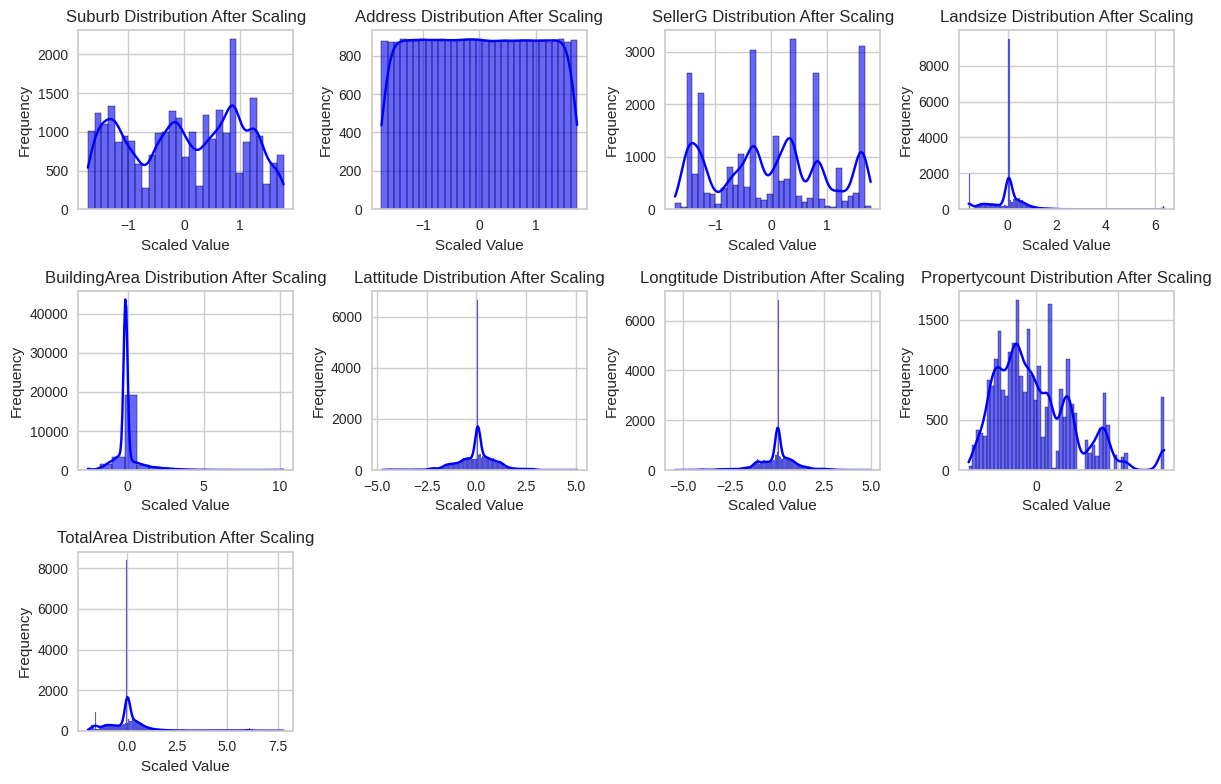

In [168]:
# Özelliklerin ölçeklendirilmiş dağılımlarını görselleştirme

plt.figure(figsize=(12, 8))

for i, feature in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[feature], kde=True, color='blue', alpha=0.6)
    plt.title(f'{feature} Distribution After Scaling')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [169]:
# MAKİNE ÖĞRENMESİ (MACHİNE LEARNİNG)

# 1. Multilineer Regresyon
# 2. Metrics
# 3. Model Başarısı Ne Durumda?
# 4. Performans Metriklerini Yazdırma
# 5. Pipeline Oluşturma
# 6. Tahmin hatası görselleştirme

In [170]:
# 1. Multilineer Regresyon

"""
# Amaçlardan bir tanesi bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden regression modeldir.)
"""

X=df.drop(["Price", "Address", "Lattitude", "Longtitude", "Postcode"], axis=1)  #bagımsız
y=df["Price"]  #bagımlı
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [172]:
X_train.shape

(20435, 18)

In [173]:
X_train

array([[-1.49637624,  2.10821912, -0.65247393, ..., -0.06128341,
         1.0930362 ,  0.01925085],
       [ 0.14220941, -1.0416244 , -0.65247393, ...,  3.19882964,
        -1.01432687, -1.21089577],
       [-0.9805252 ,  0.00832344,  1.76893131, ..., -0.06128341,
         0.39058184, -0.6309259 ],
       ...,
       [-0.86926322,  0.00832344, -0.65247393, ...,  2.79131551,
         0.39058184,  0.02840826],
       [ 1.59872998,  0.00832344, -0.65247393, ..., -0.06128341,
        -0.31187251, -0.41420032],
       [-0.83891904, -1.0416244 ,  1.76893131, ..., -0.06128341,
        -0.31187251, -1.54361533]])

In [174]:
X_test.shape

(6812, 18)

In [175]:
X_test

array([[ 0.63783099, -1.0416244 , -0.65247393, ..., -0.46879755,
        -1.01432687, -0.60345365],
       [-0.25226492,  0.00832344, -0.65247393, ..., -0.06128341,
        -0.31187251,  0.01925085],
       [ 1.32563237,  1.05827128, -0.65247393, ..., -0.06128341,
         1.0930362 ,  0.4313347 ],
       ...,
       [-1.52672042,  0.00832344, -0.65247393, ..., -0.06128341,
        -0.31187251,  0.33365556],
       [-0.0904293 ,  0.00832344, -0.65247393, ...,  1.56877312,
        -0.31187251, -0.84154654],
       [-0.38375636,  0.00832344, -0.65247393, ..., -0.06128341,
        -0.31187251,  0.01925085]])

In [176]:
y_train.shape

(20435,)

In [177]:
y_test.shape

(6812,)

In [178]:
len(y_test)

6812

In [179]:
# 2. Metrics

#Bu kod, bir doğrusal regresyon modelinin bias (sapma) ve varyansını hesaplamak için kullanılır.
# bıas(intercept): modelin test verileri üzerindeki tahminlerinden gerçek değerleri çıkarır ve bunların ortalamasını alarak bias değerini hesaplar.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

bias = (regressor.predict(X_test) - y_test).mean()
var = y_test.var()

print('intercept: ', regressor.intercept_)
print('coef: ', regressor.coef_[0])
print(var)

intercept:  1048998.0336637031
coef:  -63315.960755066226
391647592404.59564


In [180]:
# 3. Model Başarısı Ne Durumda?

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

Rs ={
    "Lasso()":0,
    "LinearRegression()":0,
    "Ridge()":0,
    "ElasticNet()":0,
    "KNeighborsRegressor()":0,
    "GradientBoostingRegressor()":0,
    "RandomForestRegressor()":0,
    "ExtraTreesRegressor()":0,
    "XGBRegressor()":0,
    "LGBMRegressor()":0,
    }

mae_values = {}
mse_values = {}
rmse_values = {}

# Her bir model için performans değerlerini hesapladık ve sözlüklere ekledik.

for k in Rs.keys():
    regressor = eval(k)
    regressor.fit(X_train, y_train)

# modelin test verileri üzerindeki R-kare değerini hesaplar.
    R2 = regressor.score(X_test, y_test)
    Rs[k] = R2

    y_pred = regressor.predict(X_test)

    mae_values[k] = round(mean_absolute_error(y_test, y_pred), 2)
    mse_values[k] = round(mean_squared_error(y_test, y_pred, squared=True), 2)
    rmse_values[k] = round(mean_squared_error(y_test, y_pred, squared=False), 2)


# Sonra performans değerlerini yazdıralım:

for k, R2 in Rs.items():
    print(f"Model: {k}")
    print(f"R2 Score: {R2}")
    print(f"MAE Score: {mae_values[k]}")
    print(f"MSE Score: {mse_values[k]}")
    print(f"RMSE Score: {rmse_values[k]}")
    print("\n")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info] Number of data points in the train set: 20435, number of used features: 18
[LightGBM] [Info] Start training from score 1048841.559971
Model: Lasso()
R2 Score: 0.4986953023762061
MAE Score: 307858.98
MSE Score: 199718355696.22
RMSE Score: 446898.6


Model: LinearRegression()
R2 Score: 0.49869735982245844
MAE Score: 307844.9
MSE Score: 199717536015.53
RMSE Score: 446897.68


Model: Ridge()
R2 Score: 0.49869838684045964
MAE Score: 307844.52
MSE Score: 199717126854.49
RMSE Score: 446897.22


Model: ElasticNet()
R2 Score: 0.4627998999577351
MAE Score: 312063.42
MSE Score: 214018981208.11
RMSE Score: 462621.86


Model: KNeighborsRegressor()
R2 Score: 0.6253812417200252
MAE Score: 242034.0
MSE Score: 149247040315.56
RMS

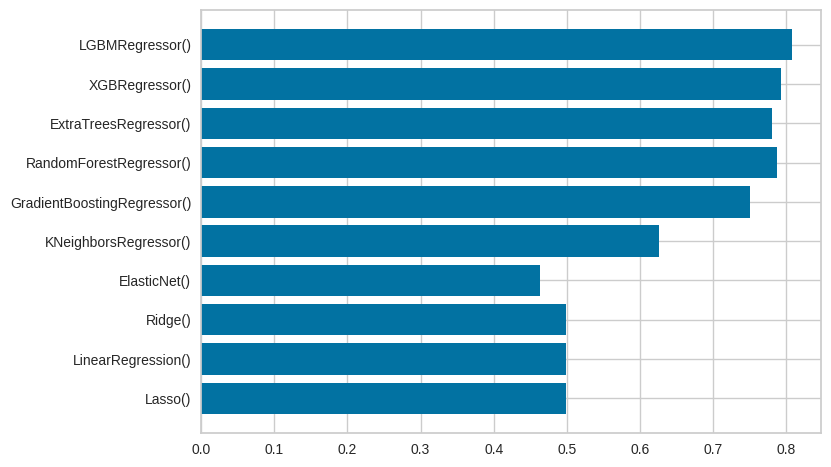

En iyi sınıflandırıcı:LGBMRegressor(), skor=0.8069548125485667


In [181]:
# 4. Performans Metriklerini Yazdırma
#En iyi skorları bar/ver grafik olarak gösterme

plt.barh(*zip(*Rs.items()))
plt.show()

print("En iyi sınıflandırıcı:{}, skor={}".format(max(Rs, key=Rs.get), max(Rs.values())))

# En iyi sınıflandırıcı:LGBMRegressor(), skor=0.8061939772104167


In [182]:
# LGBMRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor


In [183]:
# 5. Pipeline Oluşturma

pipeline_lgbm = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LGBMRegressor())
])

# Pipeline'ı eğitim setine uygulama
pipeline_lgbm.fit(X_train, y_train)

# Eğitim ve test setleri üzerinde tahmin yapma
y_train_pred_lgbm = pipeline_lgbm.predict(X_train)
y_test_pred_lgbm = pipeline_lgbm.predict(X_test)

# Performans metriklerini hesaplama
train_mae_lgbm = mean_absolute_error(y_train, y_train_pred_lgbm)
train_mse_lgbm = mean_squared_error(y_train, y_train_pred_lgbm)
train_rmse_lgbm = np.sqrt(train_mse_lgbm)
train_r2_lgbm = r2_score(y_train, y_train_pred_lgbm)

test_mae_lgbm = mean_absolute_error(y_test, y_test_pred_lgbm)
test_mse_lgbm = mean_squared_error(y_test, y_test_pred_lgbm)
test_rmse_lgbm = np.sqrt(test_mse_lgbm)
test_r2_lgbm = r2_score(y_test, y_test_pred_lgbm)

# Performans metriklerini yazdırma
print("Eğitim seti performansı:")
print("MAE:", train_mae_lgbm)
print("MSE:", train_mse_lgbm)
print("RMSE:", train_rmse_lgbm)
print("R^2 Score:", train_r2_lgbm)
print("\n")
print("Test seti performansı:")
print("MAE:", test_mae_lgbm)
print("MSE:", test_mse_lgbm)
print("RMSE:", test_rmse_lgbm)
print("R^2 Score:", test_r2_lgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 20435, number of used features: 18
[LightGBM] [Info] Start training from score 1048841.559971
Eğitim seti performansı:
MAE: 151565.14874617287
MSE: 56432238478.83342
RMSE: 237554.70628643295
R^2 Score: 0.8555413346251026


Test seti performansı:
MAE: 171051.90851156556
MSE: 77168398785.8498
RMSE: 277792.006339005
R^2 Score: 0.8063028273760962


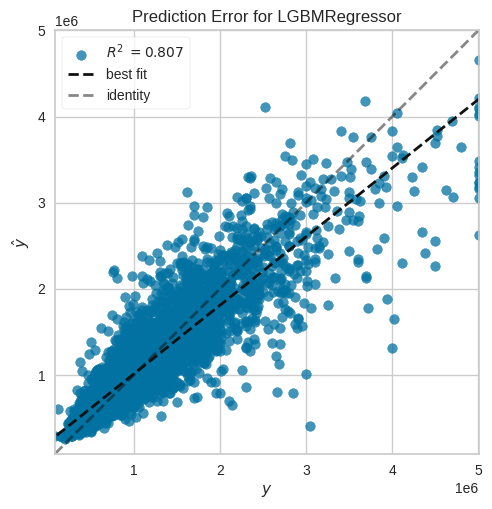

<Axes: title={'center': 'Prediction Error for LGBMRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [184]:
# 6. Tahmin hatası görselleştirme
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(regressor).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()